## Unsupervised Learning

There is no label/target in your data. In unuspervised learning, we are doing classification or should we called clustering of data. The model learn itself to differentiate orange from 
apple.

Unsupervised algorithm can act as a preprocessing steps for supervised algorithm. It also can
be used to reduce the dimensionality.

## PCA
Principle component analysis rotates features of dataset such that the rotated features are statistically uncorrelated. It can be used for dimensionality reduction. The aim is to find axes/principle component that has the largest possible variance. The consecutive component must be orthogonal the previous component

In [2]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
plt.rcParams['figure.facecolor'] = 'white'
%matplotlib inline

Standard deviations:  [ 2.53854851  0.38087708]
Principal components:  [[ 0.74827666 -0.6633868 ]
 [ 0.6633868   0.74827666]]


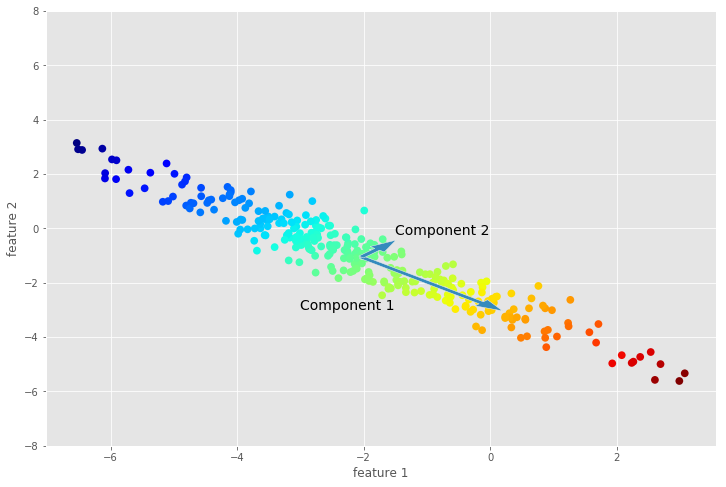

In [22]:
rnd = np.random.RandomState(5)
X = rnd.normal(size=(300,2))
X_blob = np.dot(X, rnd.normal(size=(2, 2))) + rnd.normal(size=2)

pca = PCA()
pca.fit(X_blob)
X_pca = pca.transform(X_blob)

S = X_pca.std(axis=0)
print("Standard deviations: ",S)
print("Principal components: ",pca.components_) 

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X_blob[:,0],X_blob[:,1], c=X_pca[:,0],linewidths=0,s=60,cmap='jet')
plt.arrow(pca.mean_[0],pca.mean_[1],
          S[0] *pca.components_[0,0],S[0] *pca.components_[0,1],width=.1, head_width=.3)
plt.arrow(pca.mean_[0],pca.mean_[1],
          S[1]*pca.components_[1,0], S[1]*pca.components_[1,1],width=.1,head_width=.3)
plt.text(-1.5, -0.25, "Component 2", size=14)
plt.text(-3, -3, "Component 1", size=14)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.ylim(-8, 8)
plt.show()

Now lets split them into their respective component in 1D

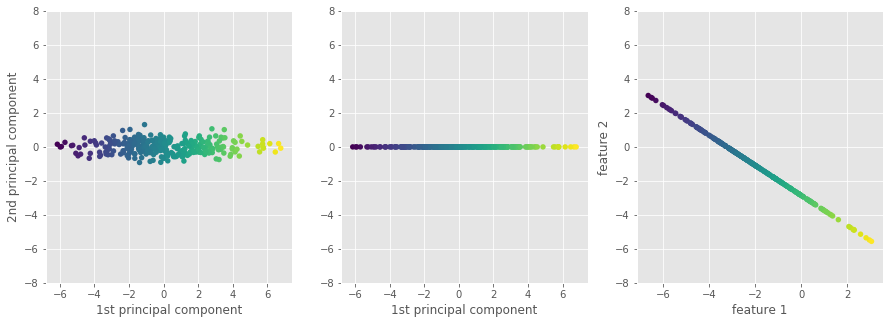

In [31]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=X_pca[:, 0], linewidths=0, s=30, cmap='viridis')
ax[0].set_xlabel("1st principal component")
ax[0].set_ylabel("2nd principal component")
ax[0].set_ylim(-8, 8)

#show 1st Principle Component
ax[1].scatter(X_pca[:,0],np.zeros(X_pca.shape[0]), c=X_pca[:,0], 
              linewidths=0, s=30, cmap='viridis')
ax[1].set_ylim(-8, 8)
ax[1].set_xlabel("1st principal component")

#show 1st PC in original graph
new_pca = PCA(n_components=1)
new_pca.fit(X_blob)
X_inverse = new_pca.inverse_transform(new_pca.transform(X_blob))
ax[2].scatter(X_inverse[:,0], X_inverse[:,1] , c=X_pca[:, 0], linewidths=0, s=30, cmap='viridis')
ax[2].set_ylim(-8, 8)
ax[2].set_xlabel("feature 1")
ax[2].set_ylabel("feature 2")
plt.show()

## Visualizing high-dimensional data
We create histogram for each feature to see how each feature can be use to seperate between 
benign and malignant cancer.

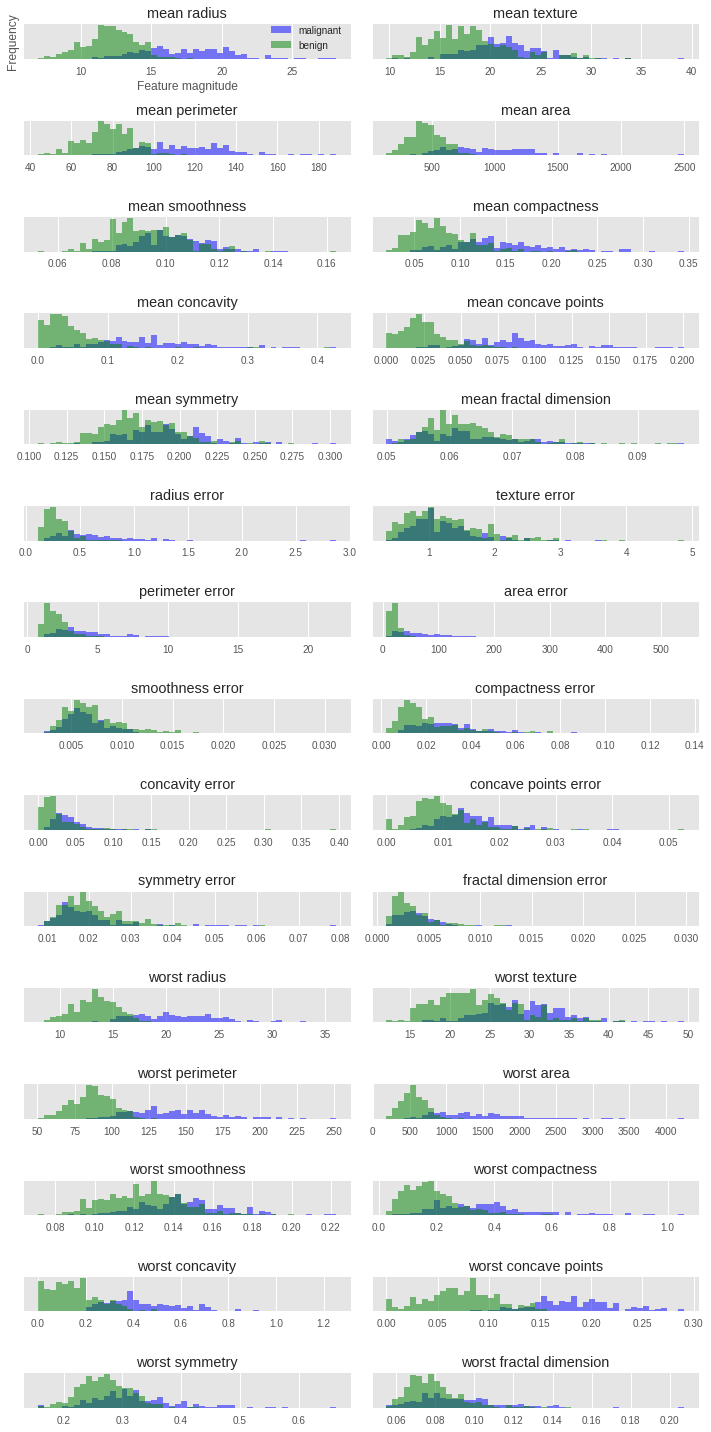

In [27]:
from sklearn import datasets

breast = datasets.load_breast_cancer()
fig, axes = plt.subplots(15,2, figsize=(10,20))
malignant = breast.data[breast.target == 0]
benign = breast.data[breast.target == 1]
fig.set_facecolor('white')
ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(breast.data[:, i], bins=50)
    ax[i].hist(malignant[:,i], bins=bins, color='blue', alpha=.5)
    ax[i].hist(benign[:,i], bins=bins, color='green', alpha=.5)
    ax[i].set_title(breast.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel('Feature magnitude')
ax[0].set_ylabel('Frequency')
ax[0].legend(['malignant','benign'],loc='best')
# ax.set_facecolor('white')
fig.tight_layout()
plt.show()


Dont choose smoothess error or symmetry error. Because on first glance, there is no way to differentiate it. It s better to scale your data before doing PCA

In [33]:
X_scal = StandardScaler().fit_transform(breast.data)

#keep only first 2 component
pca = PCA(n_components=2)
pca.fit(X_scal)

#tranform data into first two component
X_pca = pca.transform(X_scal)
print("Original shape: {}".format(str(X_scal.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


Dimensionality reduction from 30 to 2. Now lets plot


Text(0,0.5,'Second Principal component')

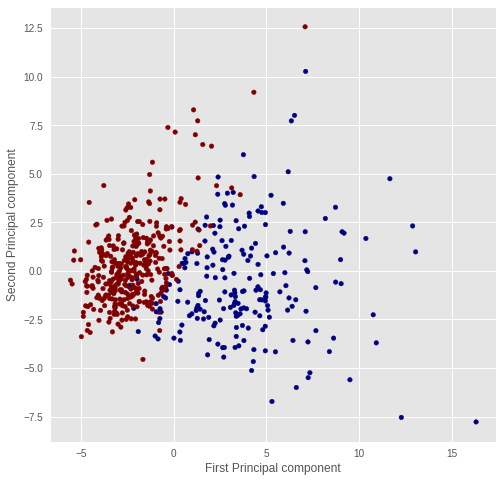

In [42]:
fig, ax = plt.subplots(figsize=(8,8))
fig.set_facecolor('white')
ax.scatter(X_pca[:,0],X_pca[:,1],c=breast.target, cmap='jet', s=20)
ax.set_xlabel('First Principal component')
ax.set_ylabel('Second Principal component')

The clustering succesfully differentiate benign from malignant. Now lets disect PCA further. Each row is one component. While the column correspond to the original feature attributes which have 30 features when we first saw above

In [44]:
pca.components_.shape

(2, 30)

Lets use heatmap to see their correlation with first & second component

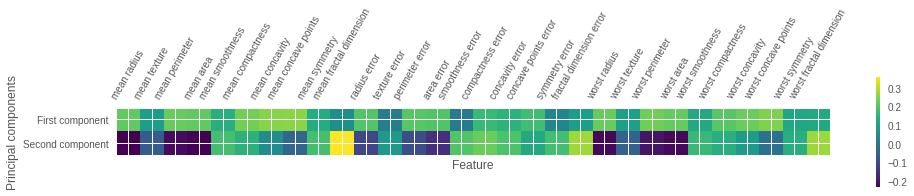

In [98]:
plt.rcParams['figure.facecolor'] = 'white'
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.xticks(range(len(breast.feature_names)),breast.feature_names,rotation=60)
plt.colorbar()
plt.xlabel("Feature")
plt.ylabel("Principal components")
plt.show()

You can see that in the first component, all features have the same sign (all positive, but it actually doesn't matter which direction). That means that there is a general correlation between all features. As one measurement is high, the others are likely to be high as well. The second component has mixed signs, and both of the components involve all of the 30 features. This mixing of features is what makes explaining the earlier axes tricky.

## Example: Eigenfaces for feature extraction

**Labeled Faces in the Wild (LFW)** dataset